<a href="https://colab.research.google.com/github/Jacobian04/Deep-Learning-with-Python/blob/main/Object_detection_YOLOS(tiny-sized)_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://huggingface.co/hustvl/yolos-tiny

In [ ]:
# Uncomment for installing transformers
# !pip install transformers
# !pip install opencv-python
# !pip install matplotlib

[46.96, 72.61, 181.02, 119.73]
tensor(0.9939, grad_fn=<UnbindBackward0>)
Detected remote with confidence 0.994 at location [46.96, 72.61, 181.02, 119.73]
[340.66, 79.19, 372.59, 192.65]
tensor(0.9747, grad_fn=<UnbindBackward0>)
Detected remote with confidence 0.975 at location [340.66, 79.19, 372.59, 192.65]
[12.27, 54.25, 319.42, 470.99]
tensor(0.9836, grad_fn=<UnbindBackward0>)
Detected cat with confidence 0.984 at location [12.27, 54.25, 319.42, 470.99]
[41.66, 71.96, 178.7, 120.33]
tensor(0.9223, grad_fn=<UnbindBackward0>)
Detected remote with confidence 0.922 at location [41.66, 71.96, 178.7, 120.33]
[342.34, 21.48, 638.64, 372.46]
tensor(0.9137, grad_fn=<UnbindBackward0>)
Detected cat with confidence 0.914 at location [342.34, 21.48, 638.64, 372.46]


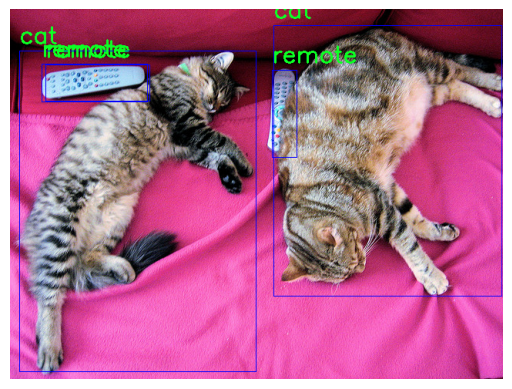

In [10]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image, ImageDraw
import torch
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utilities import non_maximum_suppression

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# url = "https://www.gannett-cdn.com/media/USATODAY/USATODAY/2013/03/21/xxx-grand-haven-beautiful-lakeside-16_9.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
# Open the image using PIL
image_pil = Image.open(requests.get(url, stream=True).raw)

model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

inputs = image_processor(images=image_pil, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes

# print results
target_sizes = torch.tensor([image_pil.size[::-1]])
# print(target_sizes)
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

# Draw a rectangle 
# Convert PIL image to NumPy array
image_np = np.array(image_pil)
# Convert NumPy array to cv2 image
image_cv2 = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)#[:,:,::-1]
result_img = image_cv2.copy()

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
  
  # print(box)
  # print(score)
  box = [round(i, 2) for i in box.tolist()]
  pred = model.config.id2label[label.item()] # label.item() return index number
  print(box)
  print(score)
  print(
      f"Detected {pred} with confidence "
      f"{round(score.item(), 3)} at location {box}"
  )

  ### Draw a rectangle ###
  p1, p2, p3, p4 = [int(i) for i in box]
  cv2.rectangle(result_img, (p1, p2),(p3, p4), (255, 0, 0) , 1)
  cv2.putText(result_img, pred, (p1, p2-10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (36,255,12), 2)

image_rgb = result_img[:,:,::-1]

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Optional: Remove axis ticks and labels
plt.show()

In [ ]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests
import torch
from PIL import Image, ImageDraw
from transformers import YolosImageProcessor, YolosForObjectDetection

# Define the URL of the image to be detected
url = "http://images.cocodataset.org/val2017/000000039769.jpg"

# Open the image using PIL
image_pil = Image.open(requests.get(url, stream=True).raw)

# Load the pre-trained YOLOv5 model and its image processor
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

# Preprocess the image
inputs = image_processor(images=image_pil, return_tensors="pt")

# Pass the preprocessed image through the YOLOv5 model to get predictions
outputs = model(**inputs)
logits = outputs.logits
bboxes = outputs.pred_boxes

# Define the target sizes for the post-processing step
target_sizes = torch.tensor([image_pil.size[::-1]])

# Post-process the model predictions to get the final bounding boxes, scores, and labels
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

# Convert the PIL image to a NumPy array, and then to a cv2 image
image_np = np.array(image_pil)
image_cv2 = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

# Create a copy of the cv2 image to draw bounding boxes on
result_img = image_cv2.copy()

# Loop through each detected object and draw a bounding box with its label on the image
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    # Round the corners of the bounding box coordinates to the nearest integer
    box = [round(i, 2) for i in box.tolist()]
    # Get the predicted label from the model's config dictionary
    pred = model.config.id2label[label.item()]
    # Print the label, confidence score, and bounding box coordinates
    print(f"Detected {pred} with confidence {round(score.item(), 3)} at location {box}")
    # Draw a rectangle around the detected object
    p1, p2, p3, p4 = [int(i) for i in box]
    cv2.rectangle(result_img, (p1, p2), (p3, p4), (255, 0, 0), 1)
    # Add the predicted label to the image
    cv2.putText(result_img, pred, (p1, p2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (36, 255, 12), 2)

# Convert the resulting cv2 image back to an RGB format to display using matplotlib
image_rgb = result_img[:, :, ::-1]

# Display the resulting image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()